1. Introduction

# Crime Rate Prediction and Analysis

## Introduction
This notebook is designed to analyze historical crime data to predict future crime rates, classify years based on crime levels, and identify crime patterns through clustering. The project utilizes Python libraries for data manipulation, visualization, and machine learning.

## Project Setup
First, we will load the necessary libraries and the dataset to start our analysis.



2. Setup and Imports

Purpose: Prepares the environment by importing necessary libraries and setting visual parameters for the plots.
Benefit: Ensures reproducibility and consistency in visual outputs, making the analysis more structured and easier to understand.
AI Integration: Libraries like TensorFlow signal the upcoming use of deep learning, enhancing traditional machine learning models with more powerful, data-driven AI techniques.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Setting visual styles for seaborn
sns.set(style="whitegrid")


C:\Users\jeffo\AppData\Local\Temp\ipykernel_17520\420999109.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


3. Data Loading and Preliminary Exploration

Purpose: Loads the dataset and performs initial checks to understand the structure and completeness of the data.
Benefit: Early data inspection helps identify issues and opportunities for preprocessing, crucial for accurate model performance.
AI Integration: Understanding data distribution and characteristics is essential for designing AI models, particularly in deciding how to handle data preprocessing and feature engineering.

   Year  crimes.total  crimes.penal.code  crimes.person  murder  assault  \
0  1950          2784               2306            120       1      105   
1  1951          3284               2754            125       1      109   
2  1952          3160               2608            119       1      104   
3  1953          2909               2689            119       1      105   
4  1954          3028               2791            126       1      107   

   sexual.offenses  rape  stealing.general  burglary  ...  vehicle.theft  \
0               40     5              1578       295  ...            NaN   
1               45     6              1899       342  ...            NaN   
2               39     4              1846       372  ...            NaN   
3               45     5              1929       361  ...            NaN   
4               41     5              1981       393  ...            NaN   

   out.of.vehicle.theft  shop.theft  robbery  fraud  criminal.damage  \
0             

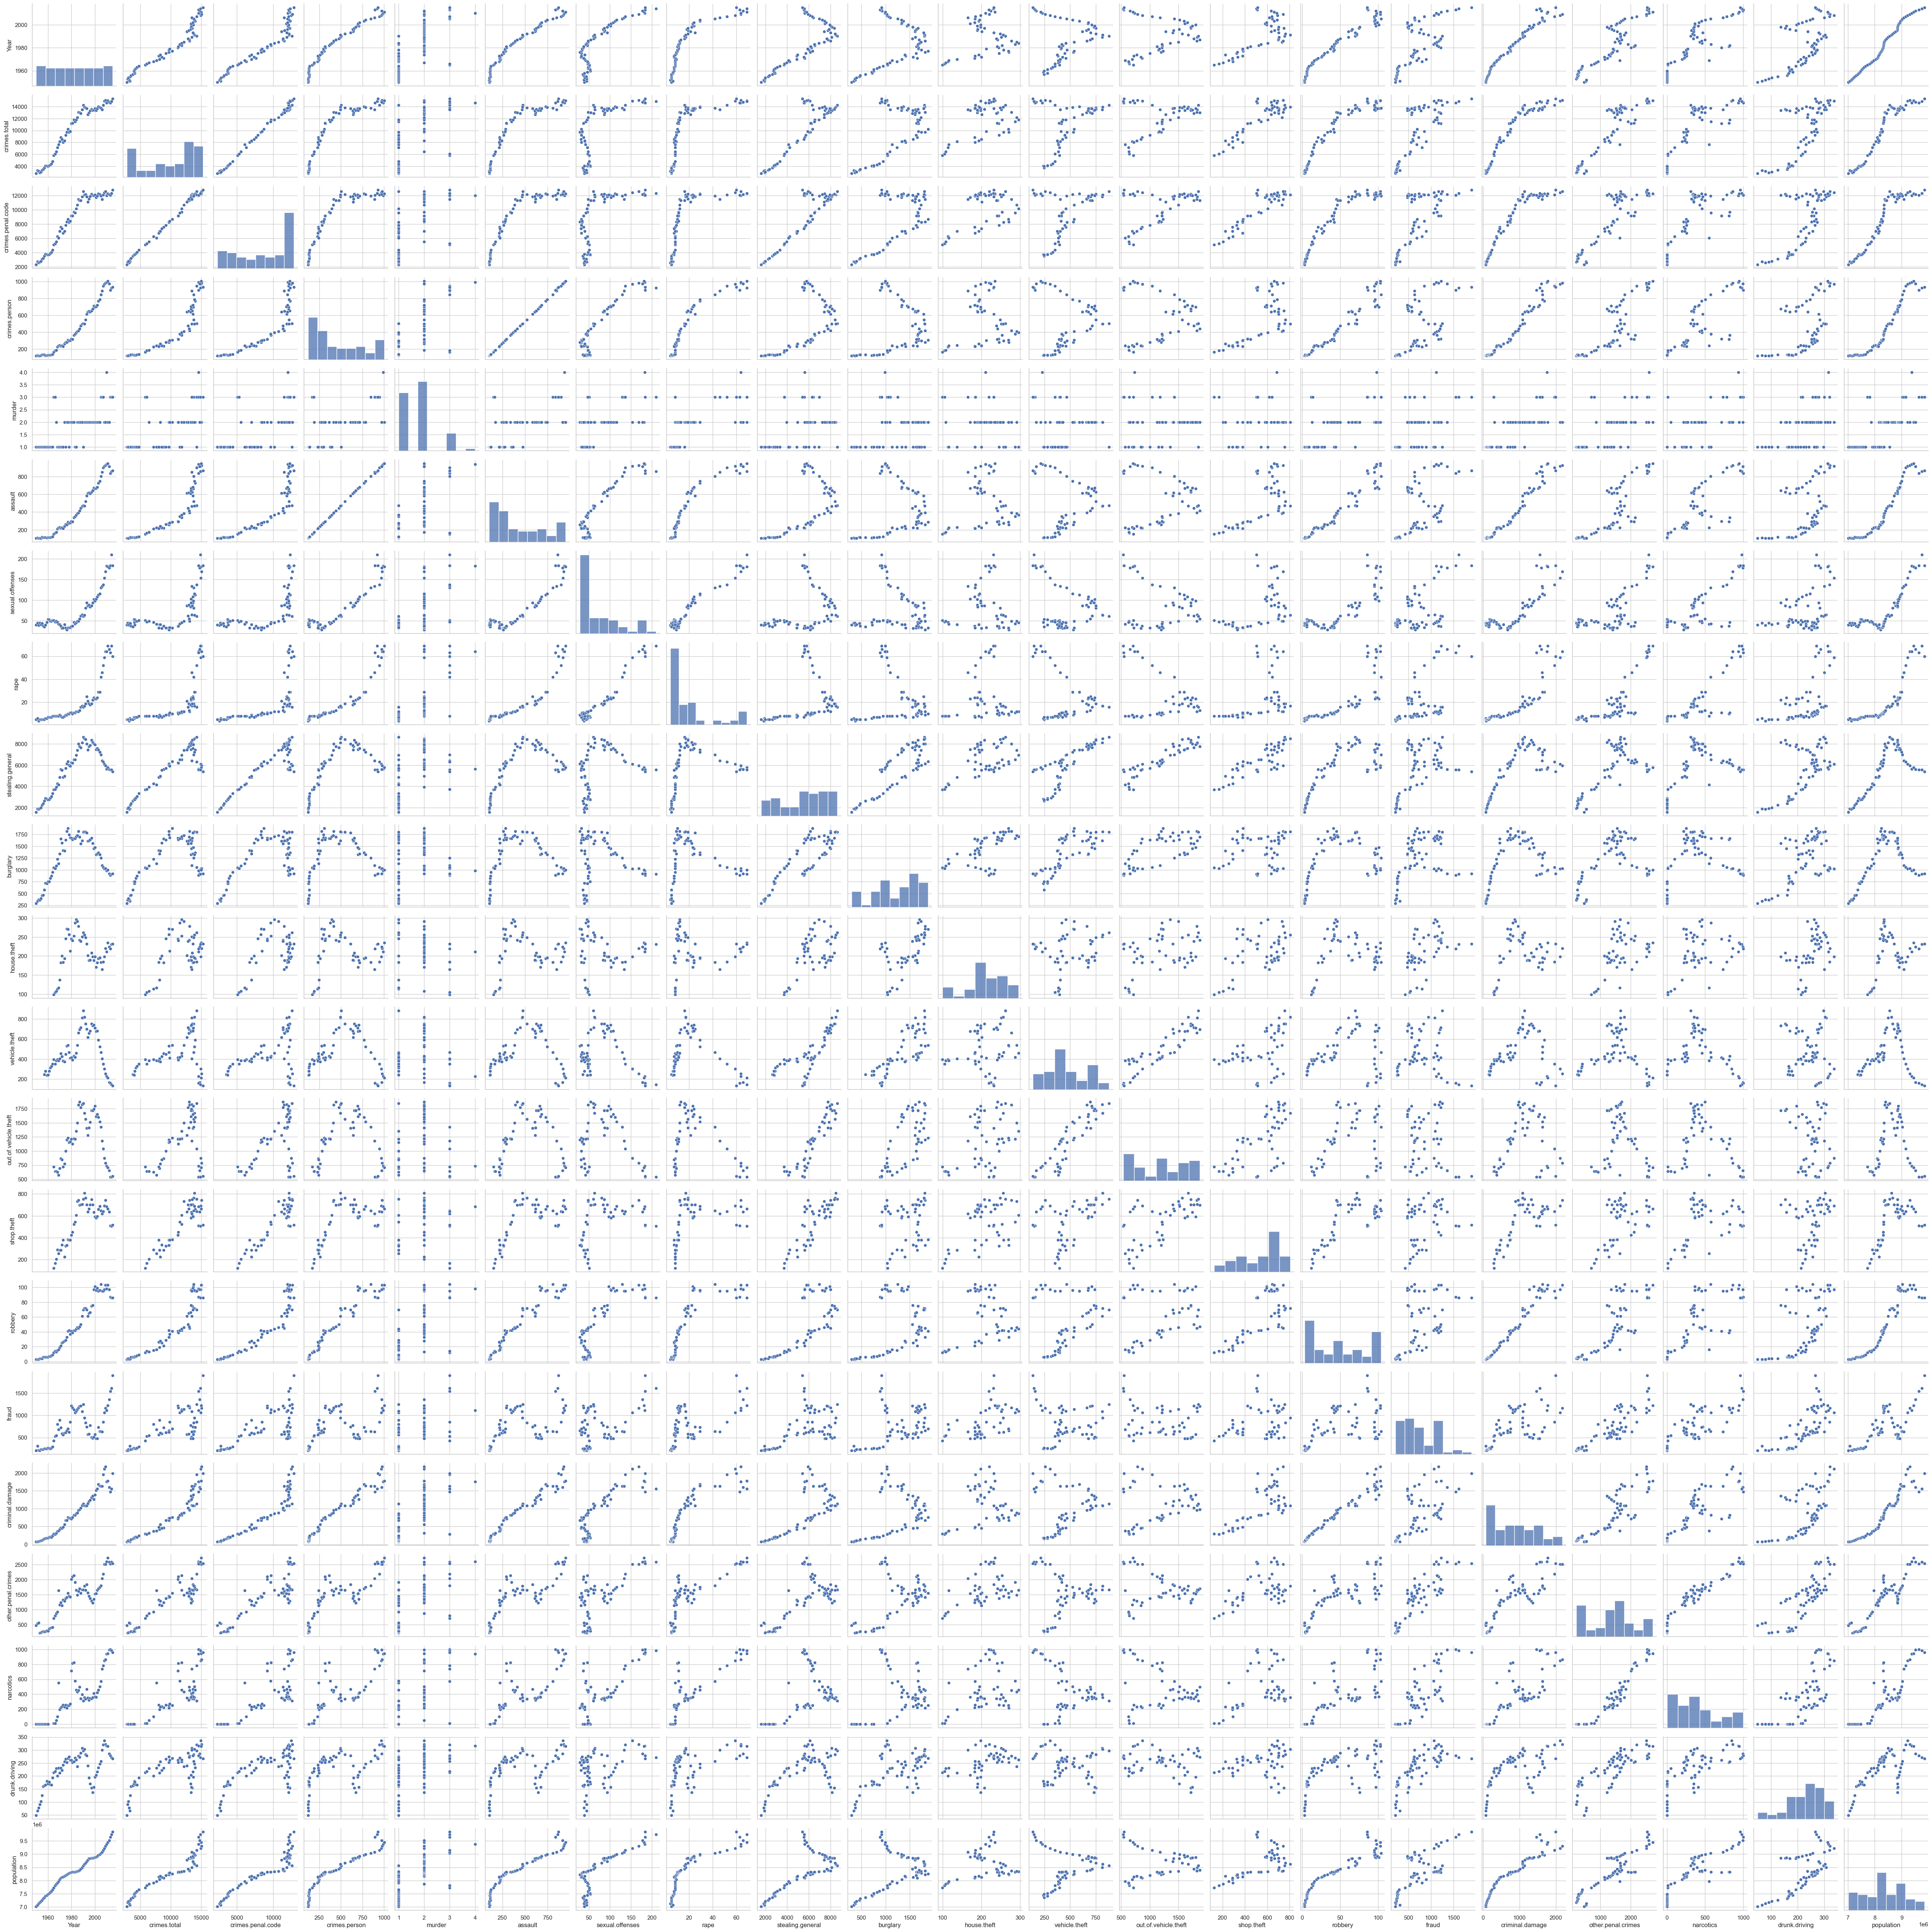

In [9]:
# Load the dataset
data = pd.read_csv('reported.csv')

# Basic data inspection
print(data.head())
print(data.describe())
print(data.info())

# Preliminary plot to visualize data distribution
sns.pairplot(data.select_dtypes(include=['int64', 'float64']))
plt.show()

# Adding a new feature for per capita crime rate
data['crimes_per_capita'] = data['crimes.total'] / data['population']


4. Data Cleaning

Purpose: Cleans the dataset by handling missing values and duplicates, ensuring data quality.
Benefit: Improves model reliability and accuracy, as clean data is fundamental for effective machine learning.
AI Integration: Clean and processed data is a prerequisite for both machine learning and more advanced AI applications, ensuring that the inputs to neural networks and other algorithms are of high quality.

In [4]:
# Handling missing values
data.fillna(data.median(), inplace=True)

# Removing duplicates
data.drop_duplicates(inplace=True)
data

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,419.0,1210.0,606.0,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,419.0,1210.0,606.0,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,419.0,1210.0,606.0,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,419.0,1210.0,606.0,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,419.0,1210.0,606.0,4,236,101,237,0.0,103,7213000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2011,14988,12267,1005,2,947,181,69,5783,995,...,213.0,706.0,663.0,103,1220,1774,2721,946.0,314,9449000
62,2012,14734,12148,974,2,914,178,66,5613,922,...,169.0,655.0,635.0,97,1356,1600,2586,994.0,286,9519000
63,2013,14603,12072,896,3,837,184,63,5552,888,...,159.0,543.0,509.0,87,1545,1470,2532,1002.0,279,9644000
64,2014,14890,12305,923,3,859,210,69,5572,913,...,147.0,542.0,505.0,86,1610,1559,2585,983.0,271,9747000


5. Exploratory Data Analysis (EDA)

Purpose: Analyzes relationships between features using a correlation matrix, helping identify which variables most influence crime rates.
Benefit: Guides feature selection and offers insights into potential collinearity among variables, which can impact model selection and performance.
AI Integration: Insights from EDA can direct the architecture design of neural networks, like deciding on input nodes and layers based on feature importance and relationships.

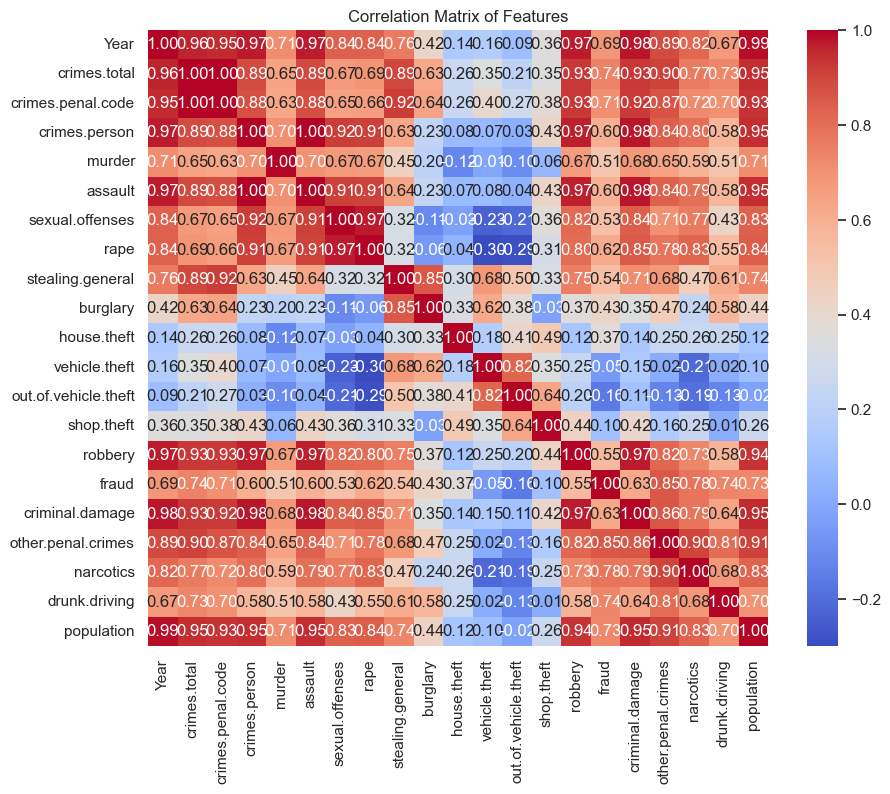

In [5]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


6. Feature Engineering

Purpose: Enhances the dataset with new features or selects the most relevant features to improve model performance.
Benefit: Directly impacts the effectiveness of predictive models by emphasizing the most informative attributes.
AI Integration: In AI, feature engineering can provide a more discriminative input set for training sophisticated models, such as those used in deep learning, affecting how well these models can learn and generalize.

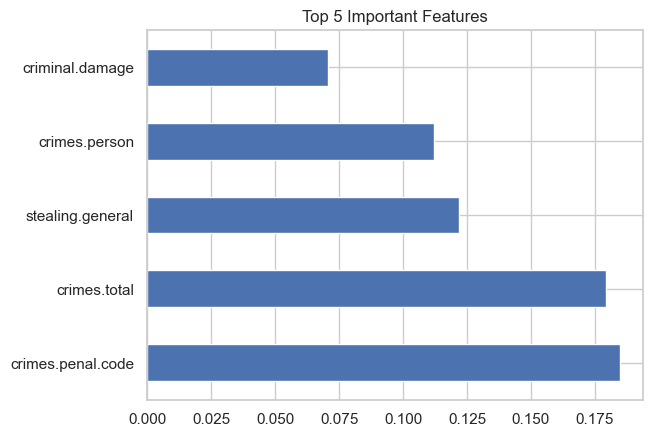

In [11]:
# Feature selection based on importance
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(data.drop(['crimes_per_capita'], axis=1), data['crimes_per_capita'])

# Extracting and visualizing feature importance
importances = pd.Series(rf.feature_importances_, index=data.columns.drop(['crimes_per_capita']))
importances.nlargest(5).plot(kind='barh')
plt.title('Top 5 Important Features')
plt.show()

# Reducing data to important features
important_features = importances.nlargest(5).index
data_reduced = data[important_features]


7. Model Building and Evaluation

Purpose: Constructs and evaluates a regression model to predict crime rates, assessing its accuracy through metrics like RMSE.
Benefit: Validates the predictive power of the model and its utility in practical scenarios.
AI Integration: Regression analysis forms a baseline; incorporating AI involves using regression outputs as features or refining models with techniques like ensemble learning or neural networks to enhance predictive accuracy.

In [12]:
# Splitting the dataset
X = data_reduced
y = data['crimes_per_capita']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Evaluating the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE for Regression Model: {rmse}")


Epoch 1/100


C:\Users\jeffo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 18834732.0000 - mae: 4074.6216 - val_loss: 15192308.0000 - val_mae: 3609.5532
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 17445652.0000 - mae: 3903.1089 - val_loss: 14109020.0000 - val_mae: 3475.9963
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16523821.0000 - mae: 3815.0630 - val_loss: 13099063.0000 - val_mae: 3348.1213
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 15104709.0000 - mae: 3646.9976 - val_loss: 12150438.0000 - val_mae: 3223.7063
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13336378.0000 - mae: 3407.9514 - val_loss: 11245008.0000 - val_mae: 3100.4702
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 13166103.0000 - mae: 3424.9980 - val_loss: 10370725.0000 - val_mae: 2977.1819
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 11720141.0000 - mae: 3199.0012 - val_loss: 9551338.0000 - val_mae: 2856.9221
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 106

8. Clustering Analysis

Purpose: Applies clustering to uncover hidden patterns and groups within the data without predefined labels.
Benefit: Offers unsupervised insights into data, useful for understanding underlying structures and behaviors.
AI Integration: Clustering can serve as a feature extraction technique that feeds into more complex AI systems, aiding in anomaly detection or segment-specific predictions.

C:\Users\jeffo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jeffo\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


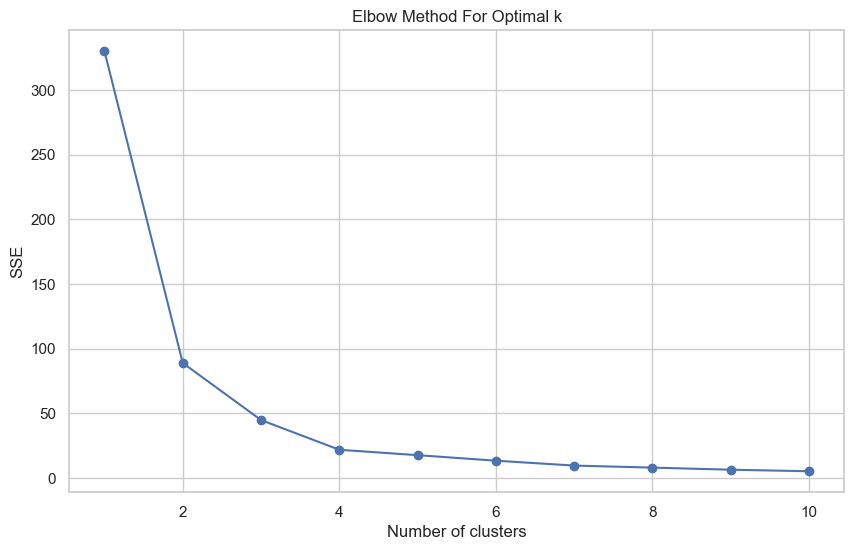

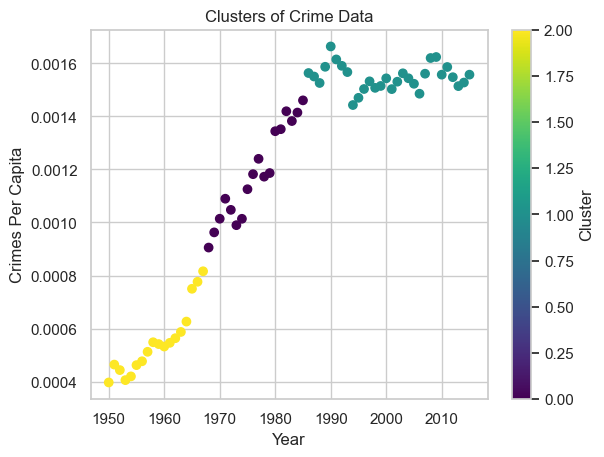

In [13]:
# Standardizing data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the Elbow method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

# Applying clustering
optimal_k = 3  # Assuming 3 is optimal from the Elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

# Visualizing the clusters
plt.scatter(data['Year'], data['crimes_per_capita'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters of Crime Data')
plt.xlabel('Year')
plt.ylabel('Crimes Per Capita')
plt.colorbar(label='Cluster')
plt.show()
